## Business Description

Many a times we have seen the misuse of the information and in the world of digital era, it has become more sensitive due to wider reach and fast delivery. There are many antisocial elements like hackers, hired in society who try to misuse the means of information like social media and other informative platorms to spread misleading information or political propaganda or money swindling announcements. To curb all this, we can take a step to find the difference between the fake and the true news. This is what this project does, predicts whether a piece of information posted online is a hoax or a truth. 

### Data loading and reading
- We have 2 datasets here one have all the entries with fake news and other have the details about True news.

In [49]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sn.set(color_codes=True)
from sklearn.utils import shuffle

fake = pd.read_csv("D:/Downloads/Assignments/Algorithms/project/Fake.csv")
true = pd.read_csv("D:/Downloads/Assignments/Algorithms/project/True.csv")


In [50]:
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [51]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [52]:
true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [53]:

fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [54]:
print("fake dataset specs")
print(fake.isnull().sum())
print("")
print("true dataset specs")
print(true.isnull().sum())

fake dataset specs
title      0
text       0
subject    0
date       0
dtype: int64

true dataset specs
title      0
text       0
subject    0
date       0
dtype: int64


#### Adding the labels to the respective datasets for further steps

In [55]:
fake['target'] = 'fake'
true['target'] = 'true'
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [56]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


#### Concatenating the data into one dataset for processing

In [57]:
df = pd.concat([fake, true]).reset_index(drop = True)

In [58]:
df.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


#### Shuffling the data to avoid the machine bias

In [59]:
df = shuffle(df)
df = df.reset_index(drop=True)

## Data Cleaning

#### Dropping the data and title columns from dataframe since we wont be using it

In [60]:
df.drop(["date"],axis=1,inplace=True)
df.drop(["title"],axis=1,inplace=True)


#### Converting the present text in dataframe to lower case alphabets. 

In [61]:
df['text'] = df['text'].apply(lambda x: x.lower())


In [62]:
df.head()

,text,subject,target
0,episode #154 of sunday wire show resumes this...,US_News,fake
1,"some 2,500 americans have died in afghanistan ...",politics,fake
2,washington (reuters) - u.s. senate republicans...,politicsNews,true
3,"jakarta/candi dasa, indonesia (reuters) - bali...",worldnews,true
4,washington (reuters) - president donald trump’...,politicsNews,true


## EDA 

In [63]:
print(df.groupby(['subject'])['text'].count())


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


#### Finding out the count of articles as per subject

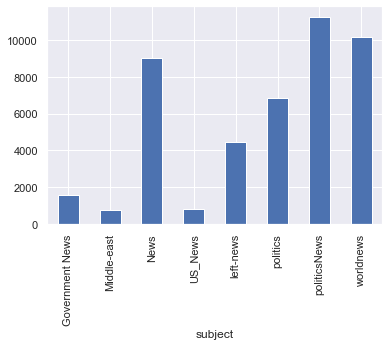

In [64]:
df.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

In [65]:
df.groupby(['target'])['text'].count()


target
fake    23481
true    21417
Name: text, dtype: int64

#### Finding out the count of fake and real news. we can see we have more fake news than true or real ones.

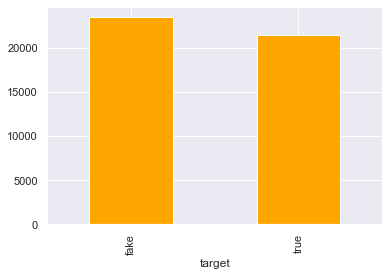

In [73]:
df.groupby(['target'])['text'].count().plot(kind='bar',color='orange')
plt.show()


#### Checking out with worcloud the intensity of maximum used words in Fake and real news respectively.

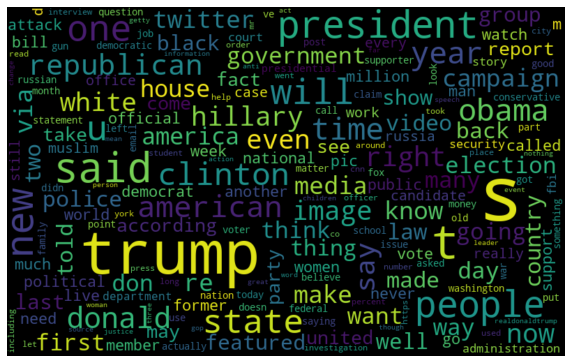

In [79]:
from wordcloud import WordCloud

fake_data = df[df["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

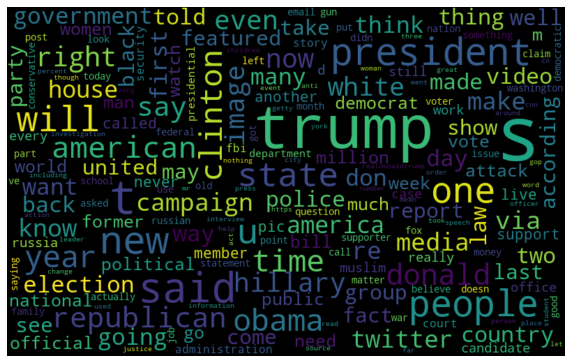

In [82]:
real_data = df[df["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()